# **PaisaBazaar Banking Fraud Analysis**

#### **Project Type: EDA (Individual Project)**

#### **Project Summary**

write a summary later

#### **Github Link**

#### **General Guidelines**

In [ ]:
# Import Libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Dataset
data = pd.read_csv(r'C:\Users\spand\Projects\LABMENTIX_PROJECTS\PaisaBazaar\Data\Raw\dataset-2.csv')
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [3]:
data.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard
99999,155629,37932,8,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.192463,382.0,No,35.104023,24.028477,High_spent_Medium_value_payments,393.673696,Poor


In [4]:
# Dataset rows and columns
print(f'No. of rows in the dataset: {data.shape[0]}')
print(f'No. of columns in the dataset: {data.shape[1]}')

No. of rows in the dataset: 100000
No. of columns in the dataset: 28


In [5]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [6]:
# Duplicate Value Count
duplicate_count = data.duplicated().sum() # Counts duplicate rows
print(f"No. of duplicate rows: {duplicate_count}")

No. of duplicate rows: 0


In [7]:
# Numerical columns of the dataset
num_cols = [col for col in data.columns if data[col].dtype != 'O']
print(f'No. of numerical columns: {len(num_cols)}')
print(f'Column names: {num_cols}')

No. of numerical columns: 21
Column names: ['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


In [8]:
# Categorical columns of the dataset
cat_cols = [col for col in data.columns if data[col].dtype == 'O']
print(f'No. of categorical columns: {len(cat_cols)}')
print(f'Column names: {cat_cols}')

No. of categorical columns: 7
Column names: ['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


#### ***Dataset Overview:***

- The dataset contains 100,000 records (rows) and 28 features (columns) out of which 21 numerical & 7 categorical columns
- It is a fairly clean dataset as it does not contain any duplicate or NaN values
- The target variable of the dataset is Credit_Score
- Features include demographic details (Age, Occupation), financial attributes (Income, Debt, Credit Utilization), behavioral factors (Payment Behavior, Payment of Minimum Amount) & some identifier columns (ID, Customer_ID, Name, SSN)

In [9]:
# Descriptive statistics of numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100000.0,8.063150e+04,4.330149e+04,5634.000000,4.313275e+04,8.063150e+04,1.181302e+05,1.556290e+05
Customer_ID,100000.0,2.598267e+04,1.434054e+04,1006.000000,1.366450e+04,2.577700e+04,3.838500e+04,5.099900e+04
Month,100000.0,4.500000e+00,2.291299e+00,1.000000,2.750000e+00,4.500000e+00,6.250000e+00,8.000000e+00
Age,100000.0,3.331634e+01,1.076481e+01,14.000000,2.400000e+01,3.300000e+01,4.200000e+01,5.600000e+01
SSN,100000.0,5.004617e+08,2.908267e+08,81349.000000,2.451686e+08,5.006886e+08,7.560027e+08,9.999934e+08
Annual_Income,100000.0,5.050512e+04,3.829942e+04,7005.930000,1.934297e+04,3.699971e+04,7.168347e+04,1.799873e+05
Monthly_Inhand_Salary,100000.0,4.197271e+03,3.186432e+03,303.645417,1.626594e+03,3.095905e+03,5.957715e+03,1.520463e+04
Num_Bank_Accounts,100000.0,5.368820e+00,2.593314e+00,0.000000,3.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Num_Credit_Card,100000.0,5.533570e+00,2.067098e+00,0.000000,4.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Interest_Rate,100000.0,1.453208e+01,8.741330e+00,1.000000,7.000000e+00,1.300000e+01,2.000000e+01,3.400000e+01


In [10]:
# Descriptive statistics of categorical columns
data.describe(include=['object']).T

,count,unique,top,freq
Name,100000,10128,Jessicad,48
Occupation,100000,15,Lawyer,7096
Type_of_Loan,100000,6261,No Data,11408
Credit_Mix,100000,3,Standard,45848
Payment_of_Min_Amount,100000,3,Yes,52326
Payment_Behaviour,100000,6,Low_spent_Small_value_payments,28616
Credit_Score,100000,3,Standard,53174


In [11]:
# Check Unique Values for each variable
data.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

#### ***Variable Understanding:***

***Numerical Features***

- ***Age:*** Ranges from 14 to 56 years, with a mean of ~33. The dataset covers mainly young to middle-aged customers.
- ***Annual_Income & Monthly_Inhand_Salary:*** Show wide variability, with a few extreme outliers (max income ~1.9M). Distributions are right-skewed, indicating a small group of very high-income customers.
- ***Num_Bank_Accounts & Num_Credit_Card:*** Median values are 5 accounts/cards, but the spread shows some customers hold up to 11 accounts or 9 cards. Possible outliers exist.
- ***Interest_Rate:*** Ranges from 1% to 34%, with a mean of 14%. Some customers face unusually high borrowing costs.
- ***Delay_from_due_date & Num_of_Delayed_Payment:*** Median payment delay is 14 days, with a maximum of 56 days. This highlights a large group of customers who frequently delay payments.
- ***Outstanding_Debt & Total_EMI_per_month:*** Extremely wide ranges (Outstanding debt up to ~4.9M). Strong indicators of financial burden.
- ***Credit_Utilization_Ratio:*** Between 20%–55%, median ~32%. Ratios above 30% may indicate risky borrowers.
- ***Credit_History_Age:*** Median ~21 years, max 42 years. May contain synthetic or unrealistic values for younger customers.
- ***Amount_invested_monthly & Monthly_Balance:*** Large variability with extreme outliers. Potential data entry errors or wealthy customers represented.
  
***Categorical Features***

- ***Occupation:*** 15 unique categories. Most common = Lawyer (7,096 records).
- ***Type_of_Loan:*** 6,261 unique entries with many variations and “No Data” entries (~11,408). Likely contains messy/free-text data requiring cleaning and grouping.
- ***Credit_Mix:*** 3 categories (Standard, Good, Bad), with Standard dominating (~45%). Imbalance exists.
- ***Payment_of_Min_Amount:*** 3 Categories = Yes/No/NM. Majority are Yes (~52%). Needs encoding and handling of “NM” values.
- ***Payment_Behaviour:*** 6 categories, most common is Low_spent_Small_value_payments (~28k).
- ***Credit_Score (Target Variable):*** 3 categories (Good, Standard, Poor). Standard beign ~53% of the data clearly shows imbalanced distribution 

### ***Data Wrangling***

In [19]:
# Make a copy of your dataset 
clean_df = data.copy()

# Let's drop pure identifier columns 
id_cols = ['ID', 'Customer_ID', 'Name', 'SSN']
clean_df.drop(columns=id_cols, inplace=True, errors='ignore')

# Split numerical & categorical features
num_features = [feature for feature in clean_df.columns if clean_df[feature].dtype != 'O']
cat_features = [feature for feature in clean_df.columns if clean_df[feature].dtype == 'O']

In [20]:
# Let's handle missing data in Payment_of_Min_Amount & Type_of_Loan columns
clean_df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [21]:
# Replace NM with Unknown 
clean_df['Payment_of_Min_Amount'] = clean_df['Payment_of_Min_Amount'].replace("NM", "Unknown")
clean_df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes        52326
No         35667
Unknown    12007
Name: count, dtype: int64

In [22]:
clean_df['Type_of_Loan'].value_counts()

Type_of_Loan
No Data                                                                                              11408
Not Specified                                                                                         1408
Credit-Builder Loan                                                                                   1280
Personal Loan                                                                                         1272
Debt Consolidation Loan                                                                               1264
                                                                                                     ...  
Auto Loan, Payday Loan, Auto Loan, Student Loan, Student Loan, Student Loan, and Home Equity Loan        8
Home Equity Loan, Payday Loan, Not Specified, and Personal Loan                                          8
Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan                                                    8
Payday Loan, Student Loa

In [23]:
# Checking how No Data rows look like
no_data_rows = clean_df[clean_df['Type_of_Loan'] == "No Data"]
pd.set_option('display.max_columns', None)
no_data_rows.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
32,1,21.0,Developer,35547.71,2853.309167,7.0,5.0,5.0,0.0,No Data,5.0,15.0,2.58,4.0,Standard,943.86,39.797764,368.0,Yes,0.0,37.643638,High_spent_Medium_value_payments,288.605522,Standard
33,2,21.0,Developer,35547.71,2853.309167,7.0,5.0,5.0,0.0,No Data,9.0,15.0,2.58,4.0,Standard,943.86,27.020360,369.0,Unknown,0.0,37.643638,High_spent_Medium_value_payments,460.887276,Standard
34,3,21.0,Developer,35547.71,2853.309167,7.0,5.0,5.0,0.0,No Data,5.0,12.0,2.58,4.0,Standard,943.86,23.462303,370.0,Yes,0.0,37.643638,Low_spent_Medium_value_payments,392.192266,Standard
35,4,21.0,Developer,35547.71,2853.309167,7.0,5.0,5.0,0.0,No Data,1.0,15.0,2.58,4.0,Standard,943.86,28.924954,371.0,Yes,0.0,37.643638,High_spent_Medium_value_payments,438.545432,Standard
36,5,21.0,Developer,35547.71,2853.309167,7.0,5.0,5.0,0.0,No Data,9.0,17.0,2.58,4.0,Standard,943.86,41.776187,372.0,Yes,0.0,37.643638,High_spent_Small_value_payments,482.607638,Standard


In [25]:
# Replace placeholders with NaN
clean_df['Type_of_Loan'] = clean_df['Type_of_Loan'].replace(["No Data", "Not Specified"], np.nan)

# Let's create a rule based mapping function to handle this
def map_loan_type(row):
    # Rule 1: Younger customers (<25) with missing loan type → Student Loan
    if pd.isna(row['Type_of_Loan']) and row['Age'] < 25:
        return 'Student Loan'
    
    # Rule 2: Very high outstanding debt → Home Loan
    elif pd.isna(row['Type_of_Loan']) and row['Outstanding_Debt'] > 50000:
        return 'Home Loan'
    
    # Rule 3: High utilization ratio → Credit-Card Loan
    elif pd.isna(row['Type_of_Loan']) and row['Credit_Utilization_Ratio'] > 40:
        return 'Credit-Card Loan'
    
    # Rule 4: Low credit inquiries + long credit history → Mortgage Loan
    elif pd.isna(row['Type_of_Loan']) and row['Num_Credit_Inquiries'] < 2 and row['Credit_History_Age'] > 120:
        return "Mortgage Loan"
    
    # Rule 5: Very high number of inquiries → Personal Loan
    elif pd.isna(row['Type_of_Loan']) and row['Num_Credit_Inquiries'] > 10:
        return "Personal Loan"
    
    # Rule 6: Salary + stable payment → Auto Loan
    elif pd.isna(row['Type_of_Loan']) and row['Annual_Income'] > 1000000 and row['Delay_from_due_date'] < 2:
        return "Auto Loan"
    
    # Default fallback
    elif pd.isna(row['Type_of_Loan']):
        return "Personal Loan"
    
    else:
        return row['Type_of_Loan']

# Apply rule-based mapping
clean_df['Type_of_Loan'] = clean_df.apply(map_loan_type, axis=1)
clean_df['Type_of_Loan'].value_counts()

Type_of_Loan
Personal Loan                                                                                        8193
Student Loan                                                                                         3654
Mortgage Loan                                                                                        3561
Credit-Builder Loan                                                                                  1280
Debt Consolidation Loan                                                                              1264
                                                                                                     ... 
Auto Loan, Payday Loan, Auto Loan, Student Loan, Student Loan, Student Loan, and Home Equity Loan       8
Home Equity Loan, Payday Loan, Not Specified, and Personal Loan                                         8
Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan                                                   8
Payday Loan, Student Loan, Mortga

### ***EDA***

#### **Univariate Analysis** 

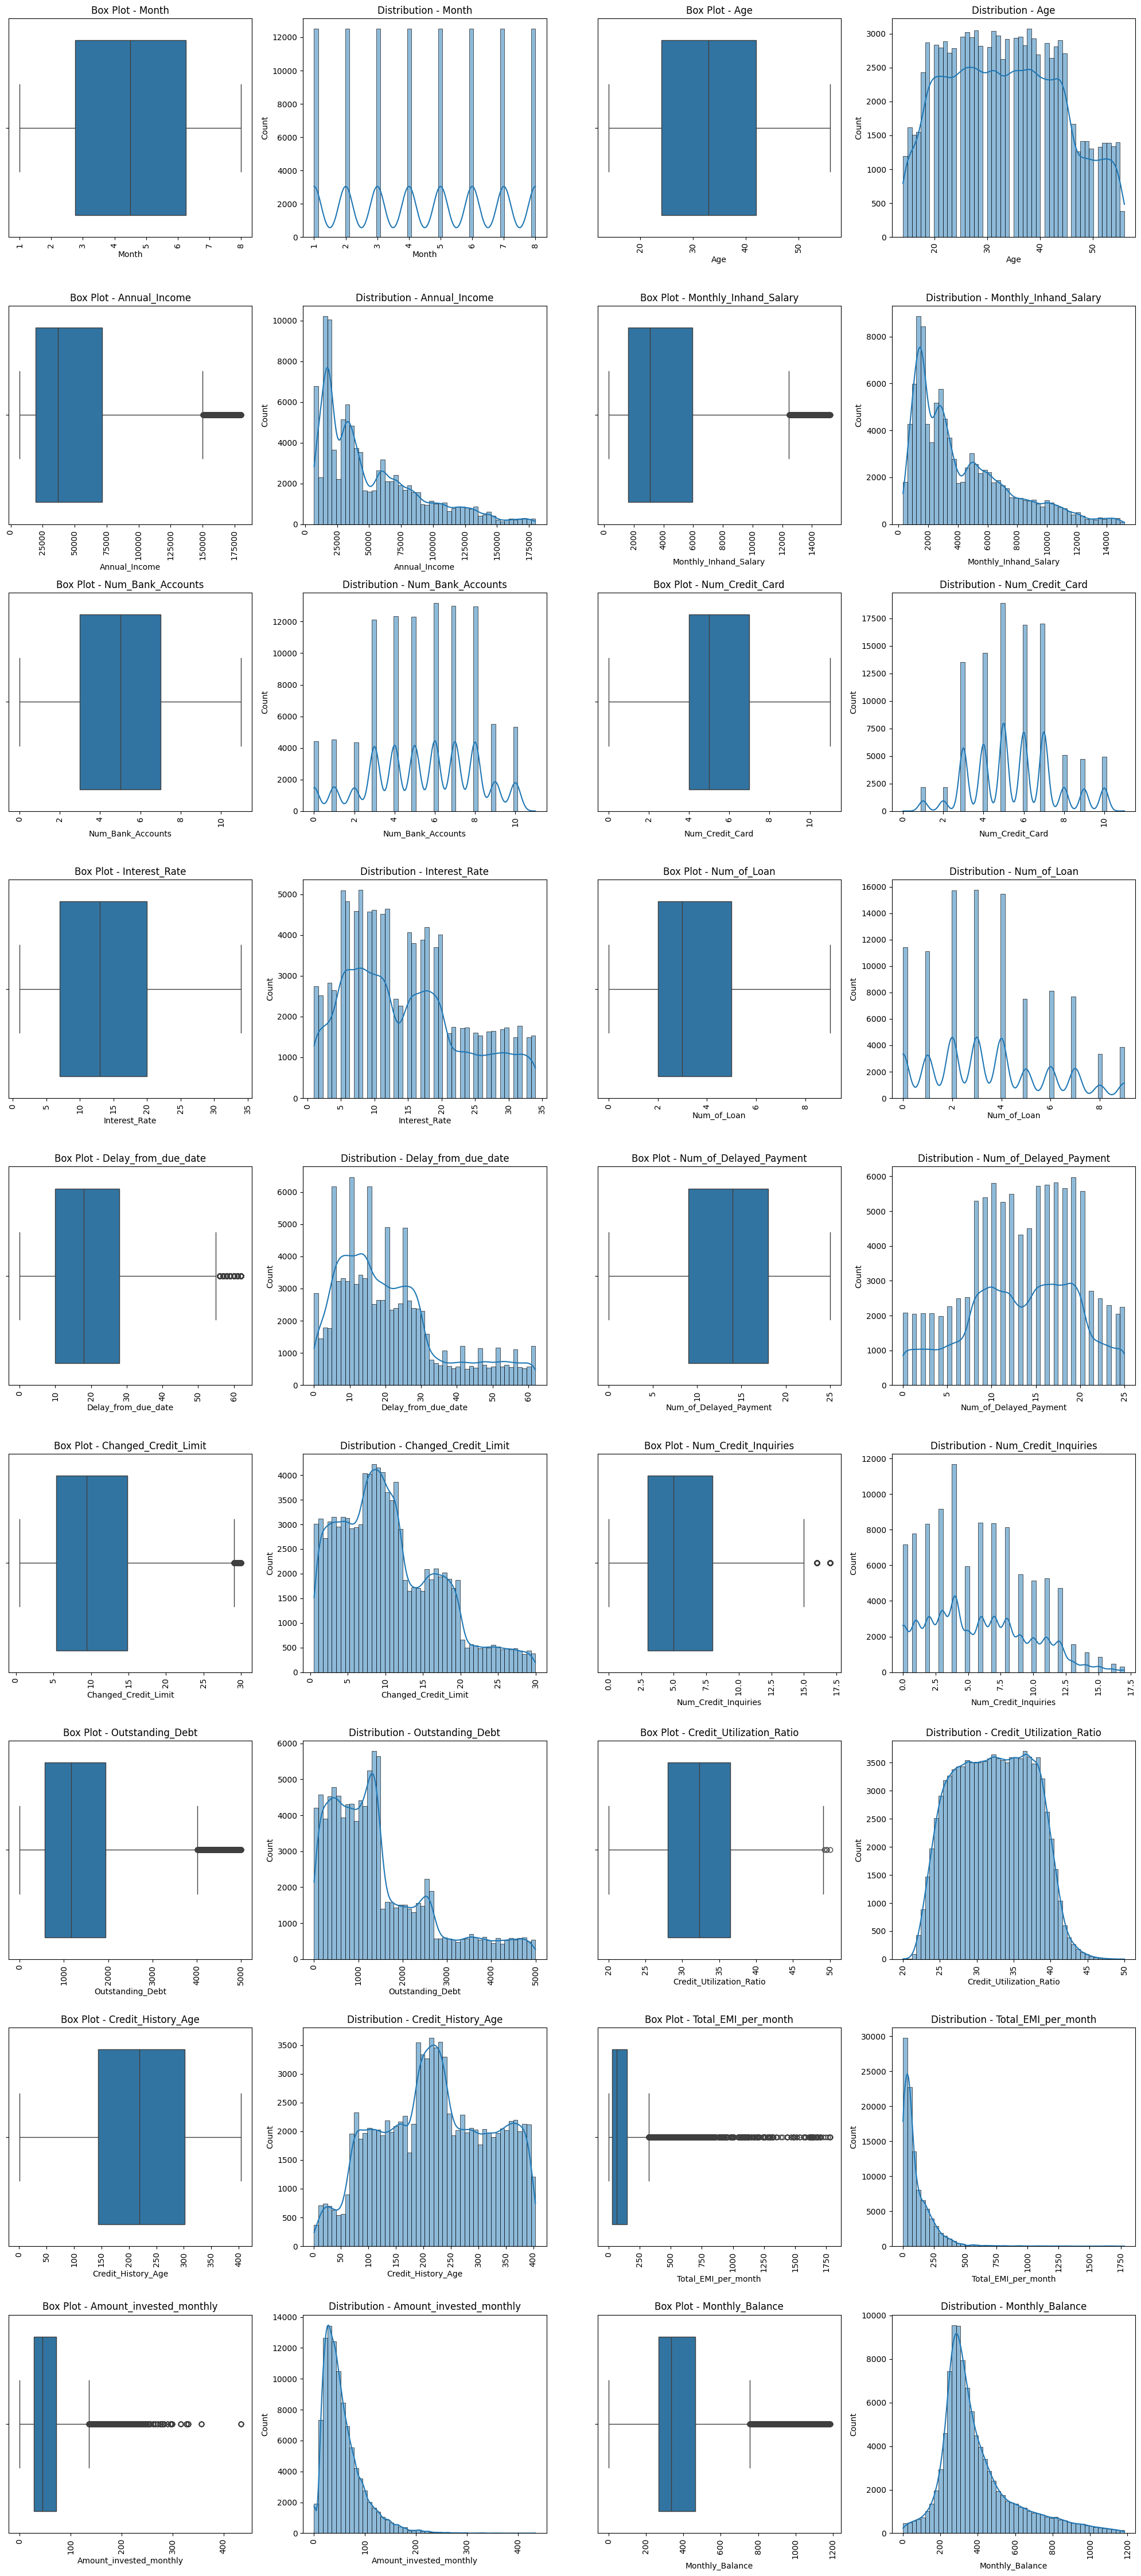

In [ ]:
# Identify outliers by visualizing them
def plot_outliers(df, cols):
    n = len(cols)
    rows = math.ceil(n / 2)   # 2 features per row
    fig, axes = plt.subplots(rows, 4, figsize=(20, 5 * rows))  
    axes = axes.flatten()

    for i, col in enumerate(cols):
        # Boxplot
        sns.boxplot(data=df, x=col, ax=axes[i*2])
        axes[i*2].set_title(f'Box Plot - {col}')
        axes[i*2].tick_params(axis='x', rotation=90)

        # Distribution Plot
        sns.histplot(data=df, x=col, kde=True, bins=50, ax=axes[i*2+1])
        axes[i*2+1].set_title(f'Distribution - {col}')
        axes[i*2+1].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

plot_outliers(clean_df, num_features)

#### ***Rationale for Using Boxplot and Histogram with KDE for Outlier Detection***
Using both visualizations to detect outliers ensures a balanced approach because:
- Boxplots are a standard statistical tool for detecting outliers based on the Interquartile Range (IQR) method.
- Histograms with KDE provide a distributional context to interpret whether those outliers are genuine anomalies or part of the underlying data pattern.
- This reduces the risk of incorrectly removing legitimate observations and ensures that outlier treatment decisions are data-driven and well-justified.


| ***Feature***                    | ***Insight from EDA***                | ***Positive Business Impact***                 | ***Negative Growth Risk***                    |
| ------------------------------ | ----------------------------------- | -------------------------------------------- | ------------------------------------------- |
| **Month** | Values 1–8, uniform spread, no outliers | Seasonality analysis, festive loan offers | None |
| **Age** | Range 14–56, peak 25–40, no outliers | Segment customers(youth, mid-age, etc) helps in targeted loan products | Very young applicants (<18) may be invalid |
| **Annual Income** | Right-skewed with a long tail, Outliers at very high income levels| Identify high-net-worth clients for premium loans | Outliers inflate averages, leading to overestimation of customer affordability if not capped |
| **Monthly Inhand Salary** | Similar right-skew with extreme high values | Income-to-debt ratio can be a strong feature for credit risk modeling | Outliers create false affordability signals, causing risky lending |
| **Num\_Bank\_Accounts** | Most 4–7, some >15 (outliers) | Financially active users → cross-selling opportunities | Too many accounts may signal over-leveraging |
| **Num\_Credit\_Card** | Most user have <10, some >15 (outliers) | High card usage = good candidates for Debt consolidation or balance transfer offers | Too many cards = higher default risk due to scattered debt |
| **Interest Rate** | Centered around ~12–15%, stable | Can benchmark pricing | None |
| **Num\_of\_Loan** | Peaks at 2–5 loans,no outliers | Helps classify multi-loan customers for consolidation | None |
| **Delay\_from\_due\_date** | Outliers with delays >50 days | Strong feature for risk scoring | Frequent delays reduce portfolio quality |
| **Num\_of\_Delayed\_Payment** | Peaks at 10-20 delays | Useful for default prediction models| High delays = bad debt accumulation |
| **Changed\_Credit\_Limit** | Many change 7-10 times, some extreme >15 (outliers) | Identifies growth potential customers (limits raised due to strong history) | Sudden raises may trigger default risks |
| **Num\_Credit\_Inquiries** | Most <10, some >15 | Can target credit-seeking users | Too many inquiries → high-risk borrowers rejected by others |
| **Outstanding\_Debt** | Highly skewed with extreme debts | Can provide Debt restructuring opportunities | High concentration of bad debt = portfolio risk |
| **Credit\_Utilization\_Ratio** | Most 20–40, capped at 50 | Excellent repayment predictor | High utilization can signal stressed borrowers |
| **Credit\_History\_Age** | Up to \~140 months, normal spread | Long history = reliable customers | Very low history = immature credit users |
| **Total\_EMI\_per\_month** | Highly skewed with extreme outliers | Important for Debt-to-income ratio analysis | High EMI → default likelihood |
| **Amount\_invested\_monthly** | Skewed, extreme upper outliers | Identify disciplined investors for wealth products | None |
| **Monthly\_Balance** | Skewed, extreme positives | Indicates strong cash flow customers | Unrealistic outliers may bias models |


In [27]:
# Handling outliers
skewed_features = ["Annual_Income", "Monthly_Inhand_Salary", "Outstanding_Debt", "Total_EMI_per_month"] # Features with high skewness → capping
signal_features = ["Num_Credit_Inquiries", "Num_of_Loan", "Delay_from_due_date"] # Features with outliers as potential signals → retain but treat carefully

# Cap extreme values
def cap_outliers(df, cols, lower_quantile=0.01, upper_quantile=0.99):
    """
    Cap extreme outliers at given quantiles.
    """
    for col in cols:
        lower = df[col].quantile(lower_quantile)
        upper = df[col].quantile(upper_quantile)
        df[col] = np.where(df[col] < lower, lower, df[col])
        df[col] = np.where(df[col] > upper, upper, df[col])
    return df

# Retain signal outliers but prevent extreme distortion 
def handle_signal_outliers(df, cols, cap=0.995):
    """
    For features where outliers are business signals (e.g., delays, inquiries),
    keep them but cap extreme rare values.
    """
    for col in cols:
        upper = df[col].quantile(cap)
        df[col] = np.where(df[col] > upper, upper, df[col])
    return df

clean_df = cap_outliers(clean_df, skewed_features) 
clean_df = handle_signal_outliers(clean_df, signal_features)

In [38]:
# Categorical variables
clean_df[cat_features].nunique()

Occupation                 15
Type_of_Loan             6260
Credit_Mix                  3
Payment_of_Min_Amount       3
Payment_Behaviour           6
Credit_Score                3
dtype: int64

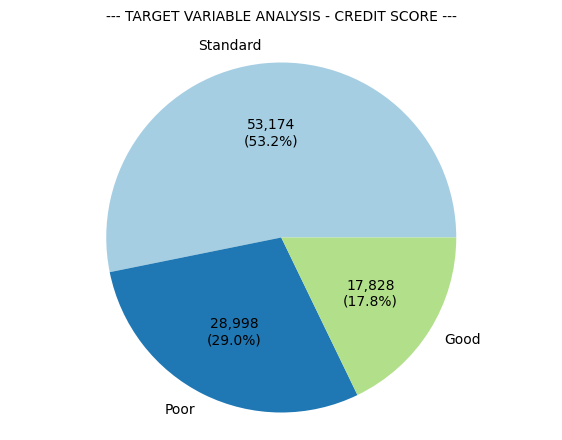

In [49]:
# Target Variable Analysis
credit_score = clean_df['Credit_Score'].value_counts()
def autopct_format(pct, sizes = credit_score.values):
    count = int(round(pct/100.*sum(sizes)))
    return f"{count:,}\n({pct:.1f}%)"

plt.figure(figsize=(7, 5))
plt.pie(credit_score, labels=credit_score.index, autopct=lambda pct: autopct_format(pct), colors=plt.cm.Paired.colors)
plt.title('--- TARGET VARIABLE ANALYSIS - CREDIT SCORE ---\n', fontsize=10)
plt.axis('equal')
plt.show()

#### ***Rationale for Using Pie Chart for the Target Variable***

- Shows Proportional Distribution Clearly: The target variable typically represents classes or categories.
- Highlights Class Imbalance: A pie chart visually communicates the relative share (%) of each class, making it easy to see class balance/imbalance at a glance.

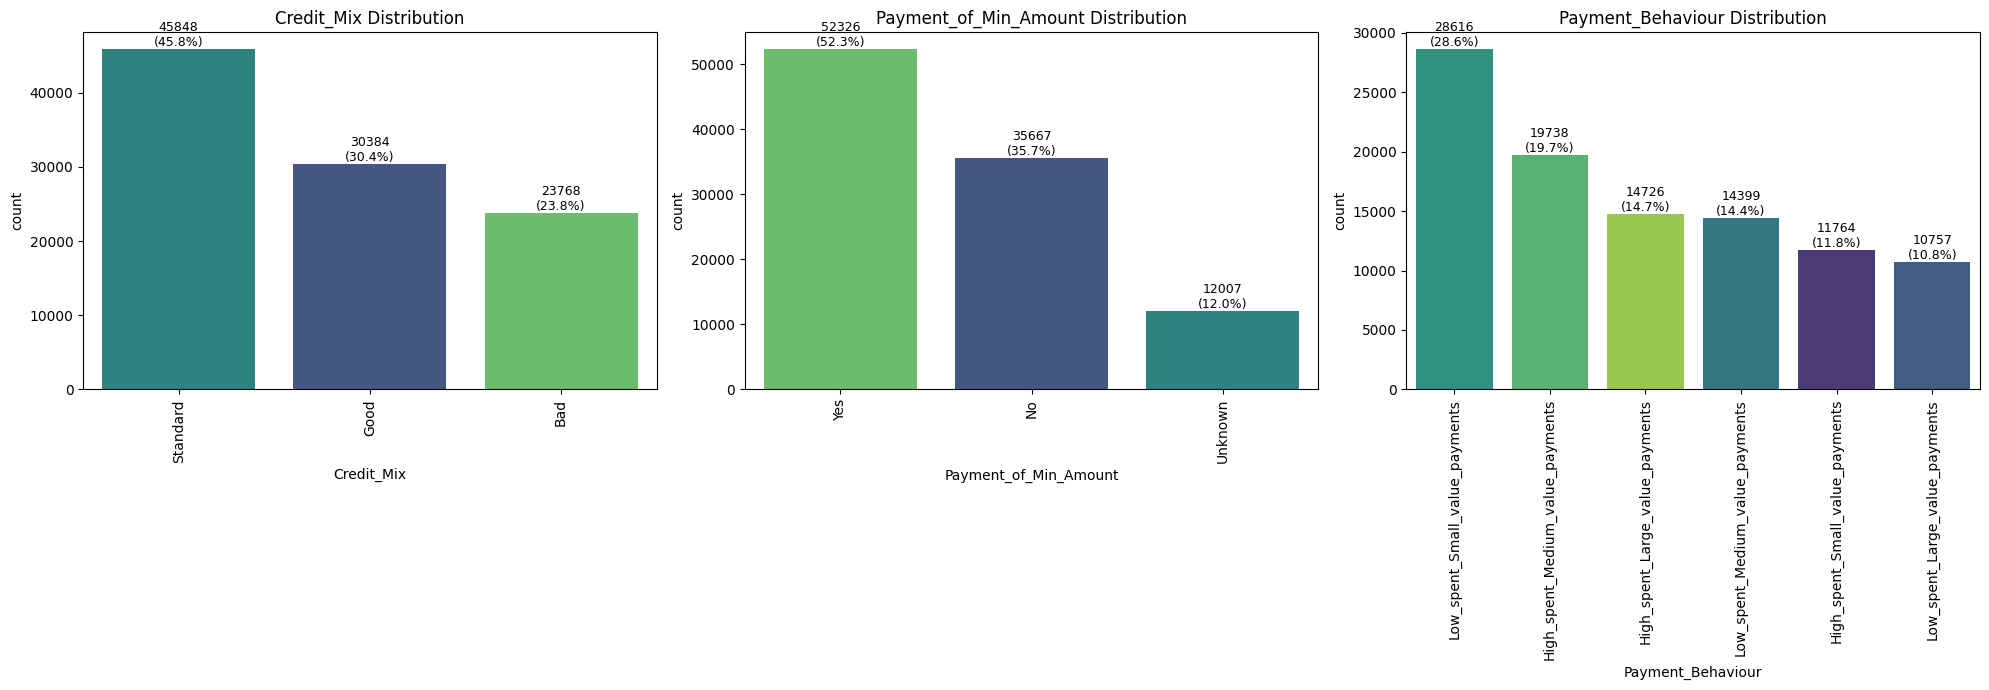

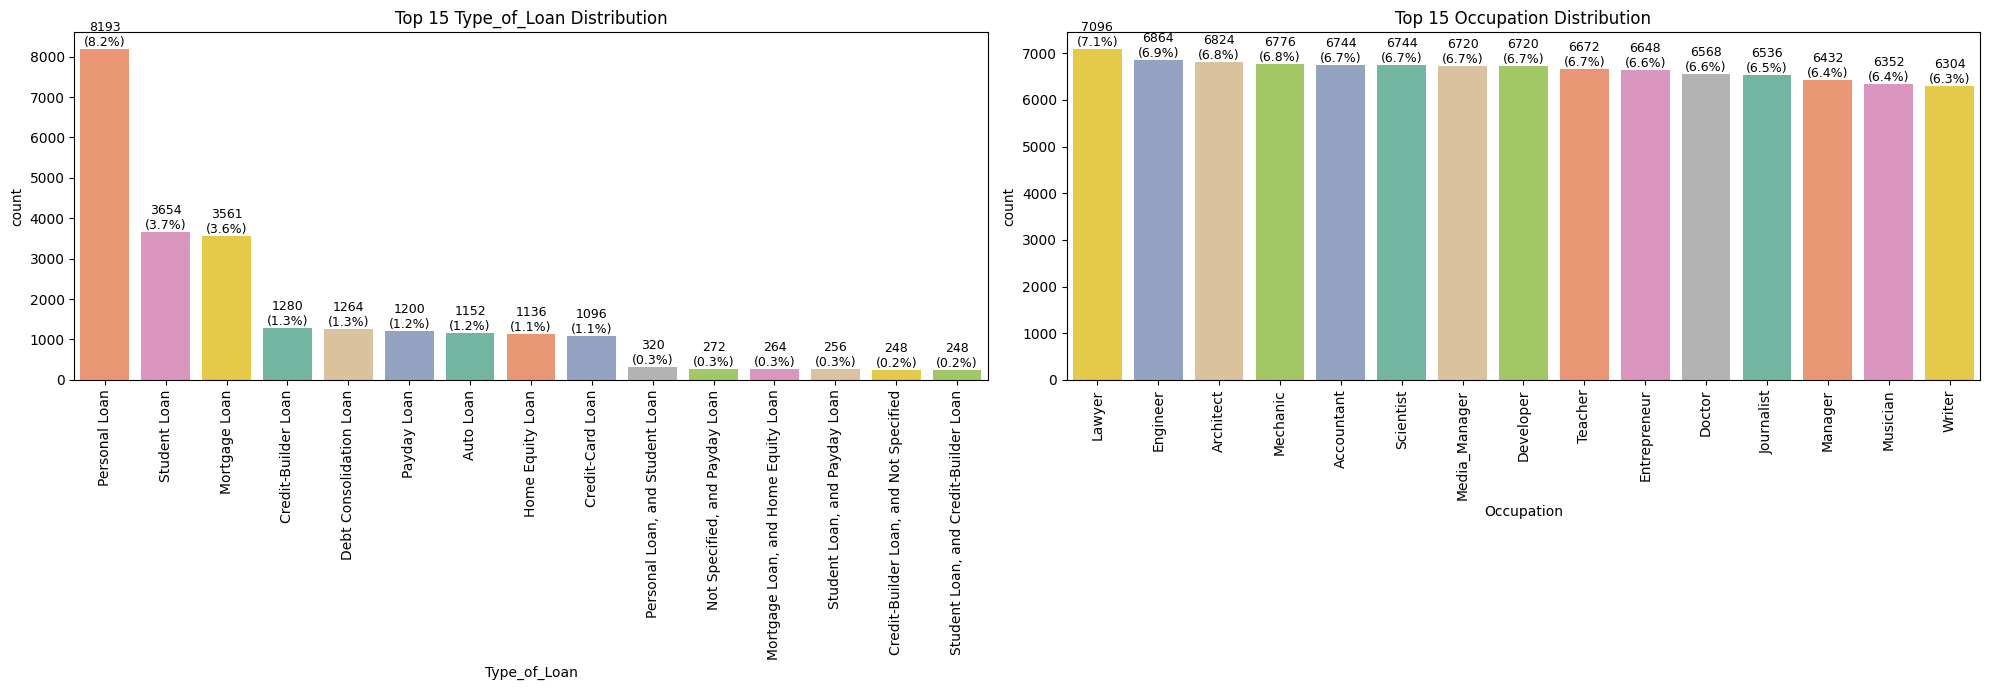

In [50]:
def plot_cat_features(df, cat_features):
    # Function to add counts & percentages
    def add_labels(ax, total):
        for p in ax.patches:
            count = int(p.get_height())
            if count > 0:
                percentage = 100 * count / total
                ax.annotate(f"{count}\n({percentage:.1f}%)",(p.get_x() + p.get_width() / 2., p.get_height()),ha="center", va="bottom", fontsize=9, color="black", rotation=0)

    # Countplot for remaining 3 categorical features
    features = [col for col in cat_features if col not in ["Type_of_Loan", "Occupation", "Credit_Score"]]
    fig, axes = plt.subplots(1, 3, figsize=(20,7))

    for i, col in enumerate(features):
        ax = sns.countplot(x=col, data=df, hue=col, legend=False, order=df[col].value_counts().index, ax=axes[i], palette="viridis")
        axes[i].set_title(f"{col} Distribution")
        axes[i].tick_params(axis="x", rotation=90)
        add_labels(ax, total=len(df))

    plt.tight_layout()
    plt.show()
    
    # Countplot of top 15 categories in Type_of_Loan & Occupation since they have many unique values
    fig, axes = plt.subplots(1, 2, figsize=(20,7))

    for i, col in enumerate(["Type_of_Loan", "Occupation"]):
        top_vals = df[col].value_counts().nlargest(15).index
        ax = sns.countplot(x=col, data=df[df[col].isin(top_vals)], hue=col, legend=False, order=top_vals, ax=axes[i], palette="Set2")
        axes[i].set_title(f"Top 15 {col} Distribution")
        axes[i].tick_params(axis="x", rotation=90)
        add_labels(ax, total=len(df)) 

    plt.tight_layout()
    plt.show()

plot_cat_features(clean_df, cat_features)

#### ***Rationale for Using Countplot for Categorical variables***
*Using countplot for categorical variables is best because:*
- It shows the absolute count of each category in the dataset, & are easy to interpret.
- They make it easy to spot imbalances or rare categories that may impact modeling or require special handling.

| **Feature**                  | **Insight from EDA**                                                                                                                          | **Positive Business Impact**                                                                                                    | **Negative Growth Risk**                                                                                                       |
| ---------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------ |
| **Type\_of\_Loan**           | Dominated by **Personal Loan (8.2%)**, followed by Student Loan & Mortgage Loan; niche loans (e.g., Payday, Credit Card Loan) are very small. | Helps in **product targeting** and designing **loan-specific marketing campaigns** (e.g., focusing on Personal Loan customers). | Over-dependence on **Personal Loan** customers creates **portfolio concentration risk** if defaults increase in this segment.  |
| **Occupation**               | Balanced distribution across top jobs (Lawyer, Engineer, Architect, etc., each \~6–7%).                                                       | Enables **segmentation by occupation** and development of **customized loan schemes**.                                          | None major, but rare categories may add **noise in modeling** if not grouped properly.                                         |
| **Credit\_Mix**              | Skewed: **Standard (46%)**, Good (30%), Bad (24%).                                                                                            | Can be used for **credit scoring** and **risk-based pricing** (better offers for Good mix, stricter terms for Bad mix).         | Fewer customers in **Good** category limit **low-risk lending opportunities**.                                                 |
| **Payment\_of\_Min\_Amount** | Majority pay **Yes (52%)**, while 36% pay **No**; \~12% are Unknown.                                                                          | Identifies **repayment discipline** → helps in **risk prediction** and **collection strategy design**.                          | High proportion paying only minimum may lead to **repayment stress and defaults**; Unknown values reduce **data reliability**. |
| **Payment\_Behaviour**       | Diverse segments; **Low\_spent\_Small\_value\_payments (28.6%)** dominates; others spread across High/Medium spenders.                        | Enables **customer behavior profiling** for better credit risk assessment and targeted offers.                                  | Complex distribution → misclassification or ignoring behavioral nuances may lead to **bad lending decisions**.                 |


#### **Bivariate Analysis** 